In [1]:
import os,cv2
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from keras import backend as K
K.set_image_dim_ordering('tf')

from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout,Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.applications.imagenet_utils import preprocess_input, decode_predictions
from keras.optimizers import SGD, RMSprop,adam
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image

Using TensorFlow backend.


In [2]:
from keras.datasets import cifar10
import matplotlib.pyplot as plt
%matplotlib inline
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

In [3]:
x_train = x_train.reshape(x_train.shape[0],32, 32,3)
x_test = x_test.reshape(x_test.shape[0],32, 32,3)

print('X train-shape: ',x_train.shape)
print('Y train-shape: ',y_train.shape)

print('X test-shape: ',x_test.shape)
print('Y test-shape: ',y_test.shape)

X train-shape:  (50000, 32, 32, 3)
Y train-shape:  (50000, 1)
X test-shape:  (10000, 32, 32, 3)
Y test-shape:  (10000, 1)


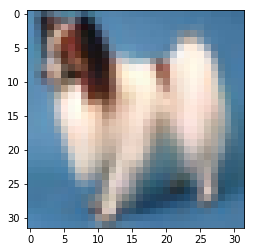

In [4]:
plt.imshow(x_train[4000])

In [5]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)


In [31]:
model = Sequential([
    
    Convolution2D(32,kernel_size=3,input_shape=(32,32,3)),
    MaxPooling2D(pool_size = (3,3)),
    Activation('relu'),
    
    Convolution2D(64,kernel_size=3),
    MaxPooling2D(pool_size = (1,1)),
    Activation('relu'),
    
    Convolution2D(64,kernel_size=3),
    MaxPooling2D(pool_size = (1,1)),
    Activation('relu'),
     
    Convolution2D(64,kernel_size=3),
    MaxPooling2D(pool_size = (1,1)),
    Dropout(0.4),
    Activation('relu'),
    
    Dense(64),
    Dense(32),
    Flatten(),
    Dense(10),
    Activation('softmax')
    
])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 10, 10, 32)        0         
_________________________________________________________________
activation_5 (Activation)    (None, 10, 10, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 8, 8, 64)          18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
activation_6 (Activation)    (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 6, 6, 64)          36928     
__________

In [32]:
model.compile(
    loss="categorical_crossentropy",
    optimizer='adam',
    metrics=['accuracy']
)

In [33]:
model_info = model.fit(
    x_train, 
    y_train, 
    epochs = 10,
    validation_split = 0.3,
    batch_size = 32
)

Train on 35000 samples, validate on 15000 samples
Epoch 1/10
35000/35000 [==============================] - 110s 3ms/step - loss: 1.7128 - acc: 0.3582 - val_loss: 1.4431 - val_acc: 0.4753
Epoch 2/10
35000/35000 [==============================] - 123s 4ms/step - loss: 1.3484 - acc: 0.5129 - val_loss: 1.2440 - val_acc: 0.5552
Epoch 3/10
35000/35000 [==============================] - 131s 4ms/step - loss: 1.1939 - acc: 0.5702 - val_loss: 1.1080 - val_acc: 0.6067
Epoch 4/10
35000/35000 [==============================] - 174s 5ms/step - loss: 1.0908 - acc: 0.6128 - val_loss: 1.0431 - val_acc: 0.6319
Epoch 5/10
35000/35000 [==============================] - 172s 5ms/step - loss: 1.0110 - acc: 0.6424 - val_loss: 1.0019 - val_acc: 0.6499
Epoch 6/10
35000/35000 [==============================] - 174s 5ms/step - loss: 0.9430 - acc: 0.6659 - val_loss: 0.9694 - val_acc: 0.6603
Epoch 7/10
35000/35000 [==============================] - 178s 5ms/step - loss: 0.8983 - acc: 0.6810 - val_loss: 0.9610 - 

In [34]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

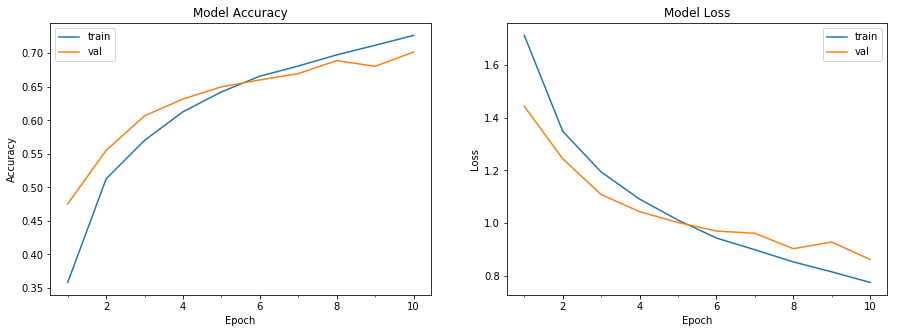

In [35]:
# model.evaluate(x_test, y_test)
plot_model_history(model_info)

#### We see from our Test Accuracy that our model will not perform well on real & unseen data

In [36]:
score = model.evaluate(x_test, y_test, verbose=1)
print("Test score:", score[0])
print('Test accuracy:', score[1])

10000/10000 [==============================] - 8s 823us/step
Test score: 0.87349791441
Test accuracy: 0.6996


#### Load Image for prediction

In [39]:
# preds = model.predict('test/scroll001.jpg')

img = image.load_img('test/800.jpg', target_size = (32,32))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
model.predict(x)

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]], dtype=float32)

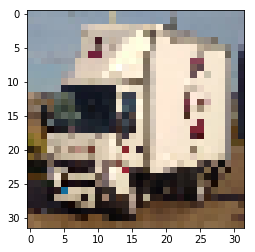

In [40]:
# predict
plt.imshow(img)

##### The above truck is classified correctly by our model, it does with most Vehicles but terrible at classifying other classes of animals and such

#### 

# LETS TRY TO PREDICT THE SAME IMAGE WITH SqueezeNet
###### SqueezeNet uses Weights trained on the ImageNet Dataset to make predictions

In [43]:
from keras.applications.imagenet_utils import preprocess_input, decode_predictions
from squeezenet import SqueezeNet
from keras.preprocessing import image

model = SqueezeNet()
# model.summary()
img = image.load_img('test/800.jpg', target_size = (227,227))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

predict = model.predict(x)

Probability 40.02% => [recreational_vehicle]


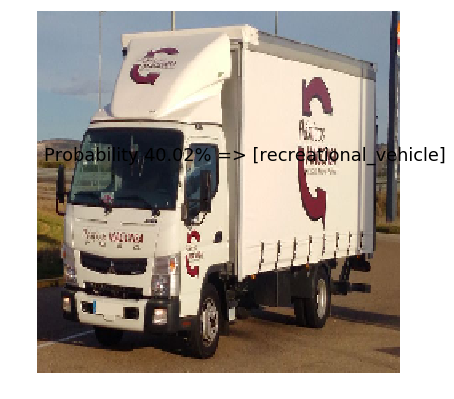

In [44]:
all_results = decode_predictions(predict)
for results in all_results:
    for result in results:
        print('Probability %0.2f%% => [%s]' % (100*result[2], result[1]))
        result_text= 'Probability %0.2f%% => [%s]' % (100*result[2], result[1])
        break

plt.figure(num=1,figsize=(8, 6), dpi=80)
plt.imshow(img)
plt.text(130,90,result_text,horizontalalignment='center', verticalalignment='center',fontsize=16,color='black')
plt.axis('off')
plt.show()